In [26]:
library(usmap)
library(shiny)
library(ggplot2)
library(usmap)
# install.packages("gridExtra","/anaconda3/lib/R/library")
library(gridExtra)
library(maptools)
library(ggplot2)
# gpclibPermit()

In [27]:


data_map=read.csv("StateDatabySeason58_57.csv", header = TRUE)

level=(data_map$ACTIVITY.LEVEL)



data_map$ACTIVITY.LEVEL=as.numeric(gsub("Level ", "", data_map$ACTIVITY.LEVEL))



data_map$STATENAME=fips(data_map$STATENAME)
# data_map


#---fucntion to read inout from user in order to plot
#---heat map for the specific year
readweek <- function()
{ 
  n <- readline(prompt="Enter an integer bwtween 1 and 52 : ")
 
  return(n)
}

week=readweek()

readyear <- function()
{ 
  n <- readline(prompt="Enter season 2017-18 or 2018-19 : ")
  
  return(n)
}

year=readyear()



dat=data_map[which( data_map$STATENAME!="NA" & data_map$WEEK==week & data_map$SEASON==year),]

# dat
d=data.frame(fips=dat$STATENAME, level=dat$ACTIVITY.LEVEL)
# data frames are stored in d.

p2=plot_usmap(data = d , values = "level", lines = "black",labels=TRUE, label_color="black" ) + 
labs(title = "A Weekly Influenza Surveillance Report Prepared by the Influenza Division \n
Influenza-Like Illness (ILI) Activity Level Indicator Determined by Data Reported to ILINet")+
  scale_fill_continuous(name = "LEVEL OF ACTIVITY", label = scales::comma,low="green", high="red") + 
  theme(legend.position = "right")
# dev.off()



# newdata


Enter an integer bwtween 1 and 52 : 7
Enter season 2017-18 or 2018-19 : 2017-18


In [28]:
library(plyr)
library(ggplot2)
library(usmap)

tw_flu=read.csv("Flu_tweets_4312_with_state.csv", header=TRUE)
tw_influenza=read.csv("Influenza_tweets_2465_with_state.csv", header=TRUE)


tw_flu=tw_flu[which(!tw_flu$state_name==""),]   #3580
tw_influenza=tw_influenza[which(!tw_influenza$state_name==""),]     #1374


df1=data.frame(count(tw_flu,"state_name"))

#-----------------state name to fips code----------------------
colnames(df1)[1]="state" # reference: https://stackoverflow.com/questions/7531868/how-to-rename-a-single-column-in-a-data-frame
# df
# jpeg("flu_world_map.jpg")
p3=plot_usmap(data = df1 , values = "freq", lines = "black",labels=TRUE, label_color="black" ) + 
  scale_fill_continuous(name = "LEVEL OF ACTIVITY", label = scales::comma,low="white", high="red") + 
  theme(legend.position = "right")
# dev.off()

In [29]:
df=data.frame(count(tw_influenza,"state_name"))

#-----------------state name to fips code----------------------
colnames(df)[1]="state"
# df

# jpeg("influenza_world_map.jpg")

p4<-plot_usmap(data = df , values = "freq", lines = "black",labels=TRUE, label_color="black" ) + 
  scale_fill_continuous(name = "LEVEL OF ACTIVITY", label = scales::comma,low="white", high="red") + 
  theme(legend.position = "right")
# dev.off()

In [30]:
library(data.table)
fg=rbindlist(list(df1, df), fill = TRUE)[,lapply(.SD, sum, na.rm = TRUE) , state]
# fg

# jpeg("combined_world_map.jpg")

p5=plot_usmap(data = fg , values = "freq", lines = "black",labels=TRUE, label_color="black" ) + 
  scale_fill_continuous(name = "LEVEL OF ACTIVITY", label = scales::comma,low="white", high="blue") + 
  theme(legend.position = "right")

In [31]:
library(plyr)
library(ggplot2)
library(usmap)

tw_flu=read.csv("Flu_tweets_4312_with_state.csv", header=TRUE)
tw_influenza=read.csv("Influenza_tweets_2465_with_state.csv", header=TRUE)


tw_flu=tw_flu[which(!tw_flu$state_name==""),]   #3580
tw_influenza=tw_influenza[which(!tw_influenza$state_name==""),]     #1374


df1=data.frame(count(tw_flu,"state_name"))

#-----------------state name to fips code----------------------
colnames(df1)[1]="state" # reference: https://stackoverflow.com/questions/7531868/how-to-rename-a-single-column-in-a-data-frame
# df
# jpeg("flu_world_map.jpg")
p1=plot_usmap(data = df1 , values = "freq", lines = "black",labels=TRUE, label_color="black" ) + 
  scale_fill_continuous(name = "LEVEL OF ACTIVITY", label = scales::comma,low="white", high="red") + 
  theme(legend.position = "right")
# dev.off()

In [ ]:
ui<- pageWithSidebar(
    
    headerPanel("Flu Maps "),
    
    sidebarPanel(
    
        selectInput("keyword","keyword:",list("CDC Vs Twitter","flu","influenza"))
    
    ),
    
    mainPanel(
    
    h3(textOutput("caption")),
    plotOutput("maps")
    
    
    )
)


server<- function(input,output){
    
   
        
    formulaText <- reactive({
    paste(input$keyword)
  })
        
    
     output$caption <- renderText({
    formulaText()
  })
    
    output$maps <- renderPlot({
    switch(input$keyword,"CDC Vs Twitter"=grid.arrange(p5, p2, ncol=2),"flu"=p3,"influenza"=p4)
    
    })

    
}
    
    
shinyApp(ui,server)



Listening on http://127.0.0.1:5729


In [ ]:
# runApp("~/shinyapp")

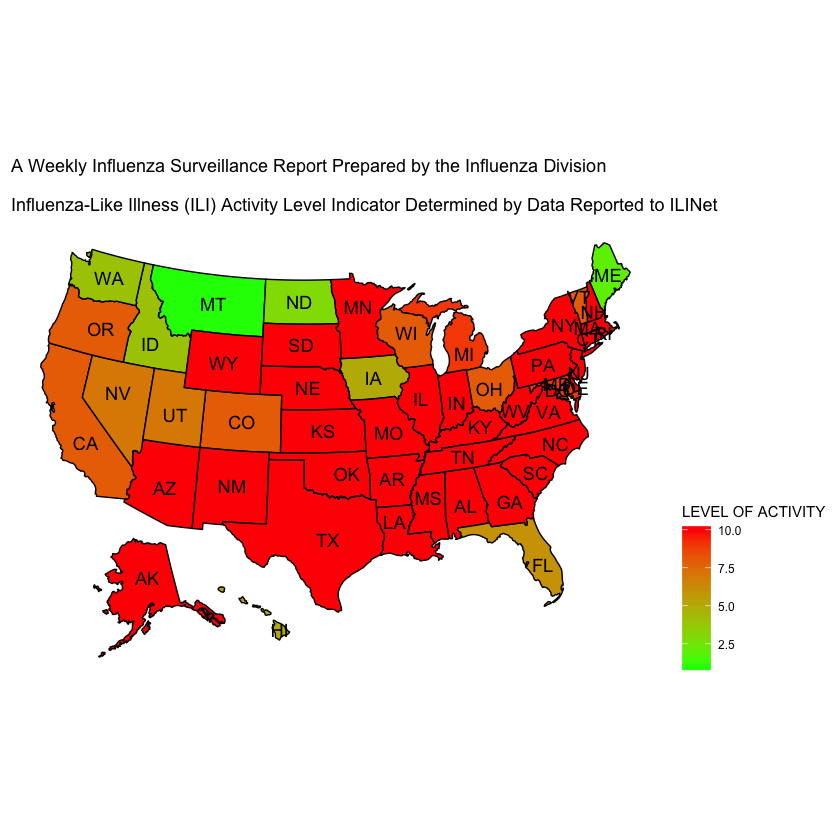

In [21]:
p2

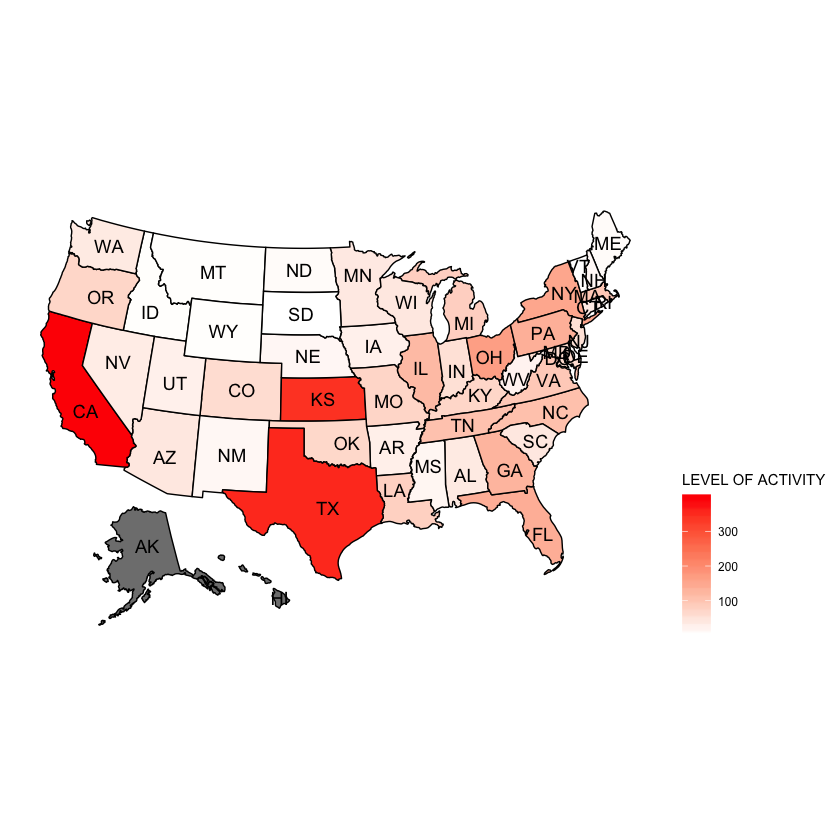

In [22]:
p3

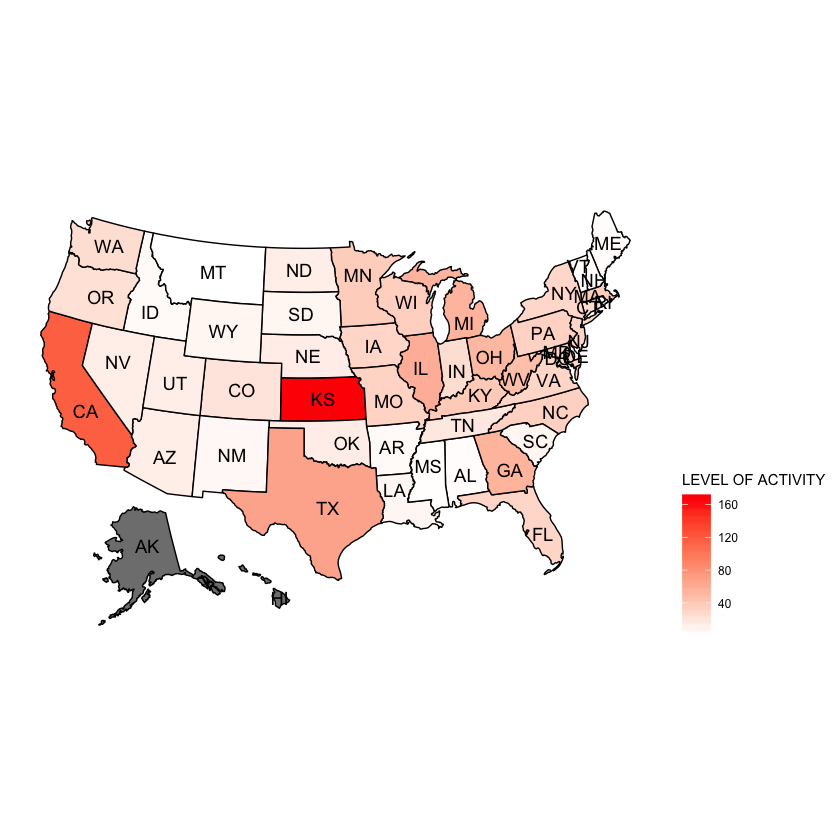

In [23]:
p4

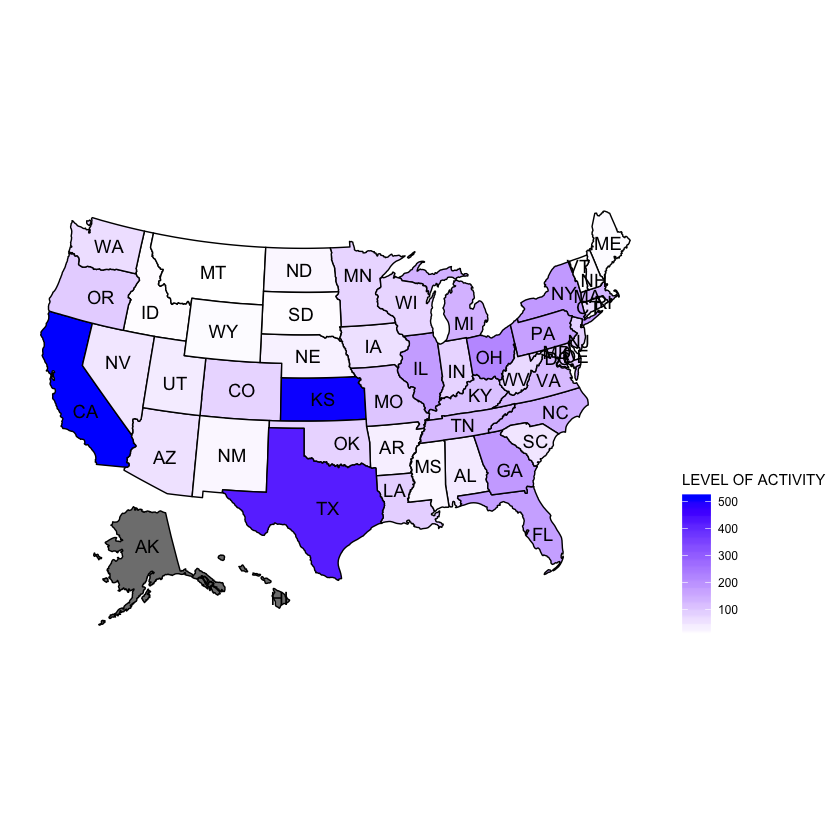

In [24]:
p5